In [3]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

In [4]:
X = pd.read_csv('clean_data')

In [5]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,40,1,2,534,3,5,3,3,...,5,5,5,5,5,4,5,3,3,1
1,0,0,49,0,0,383,4,4,4,1,...,2,2,3,2,4,4,5,2,0,0
2,1,0,19,0,0,550,2,3,2,4,...,1,1,4,4,4,1,3,1,35,0
3,0,0,15,0,0,1127,3,5,3,3,...,2,2,4,4,4,5,4,2,14,0
4,1,0,51,0,0,226,2,3,0,3,...,2,2,2,0,3,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,16,0,0,967,2,4,2,4,...,4,4,3,4,4,4,5,4,0,0
5996,1,0,68,0,0,913,1,5,1,3,...,5,1,1,1,1,3,1,2,13,0
5997,1,0,50,0,0,1999,1,5,1,2,...,5,5,5,1,5,4,5,5,26,0
5998,0,0,30,1,2,946,4,4,4,4,...,4,4,4,5,5,4,5,4,0,1


In [6]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [7]:
G = nx.from_numpy_matrix(A)

In [8]:
nx.is_connected(G)

True

In [9]:
#nx.draw(G,node_size=20)

In [10]:
features = pd.Series(X.satisfaction) 

In [9]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [10]:
pos = nx.spring_layout(G)

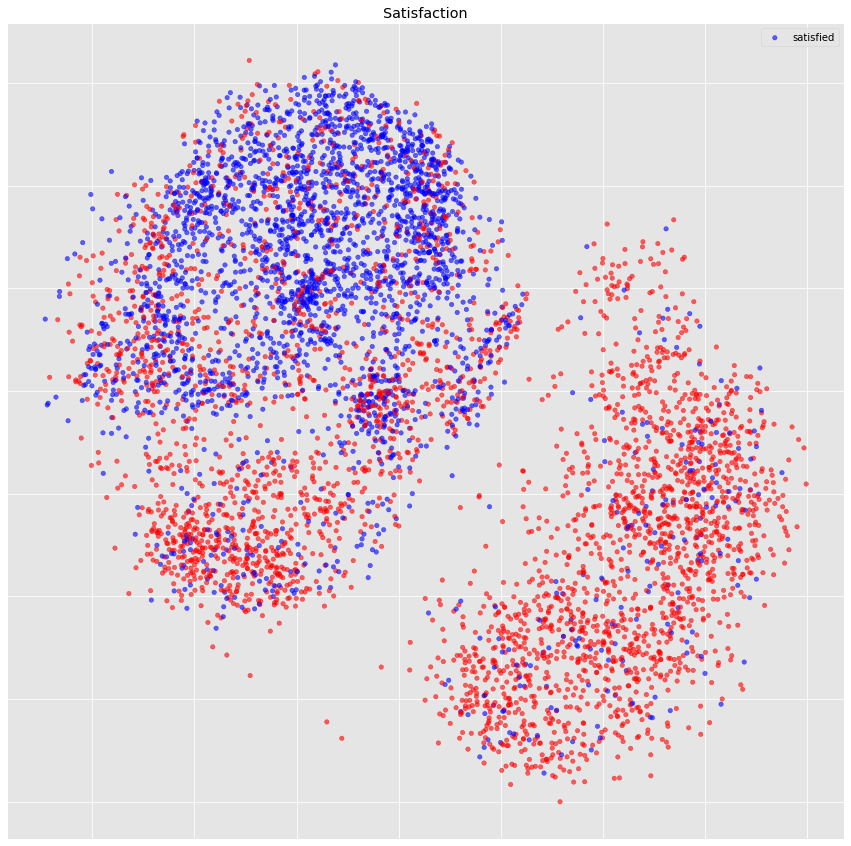

In [11]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend(['satisfied' ,'dissatisfied or neutral'])
plt.title('Satisfaction')
plt.show()

<AxesSubplot:>

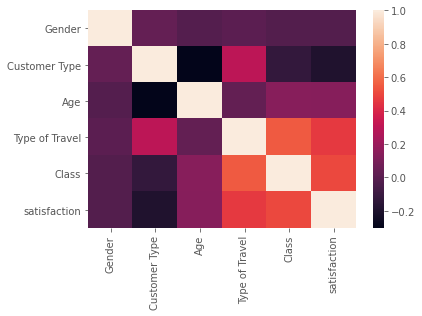

In [12]:
import seaborn as sns
cormap_vars = X[['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']]
cormap = cormap_vars.corr()
sns.heatmap(cormap)

In [13]:
colmapvar = pd.Series(X['Gender']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


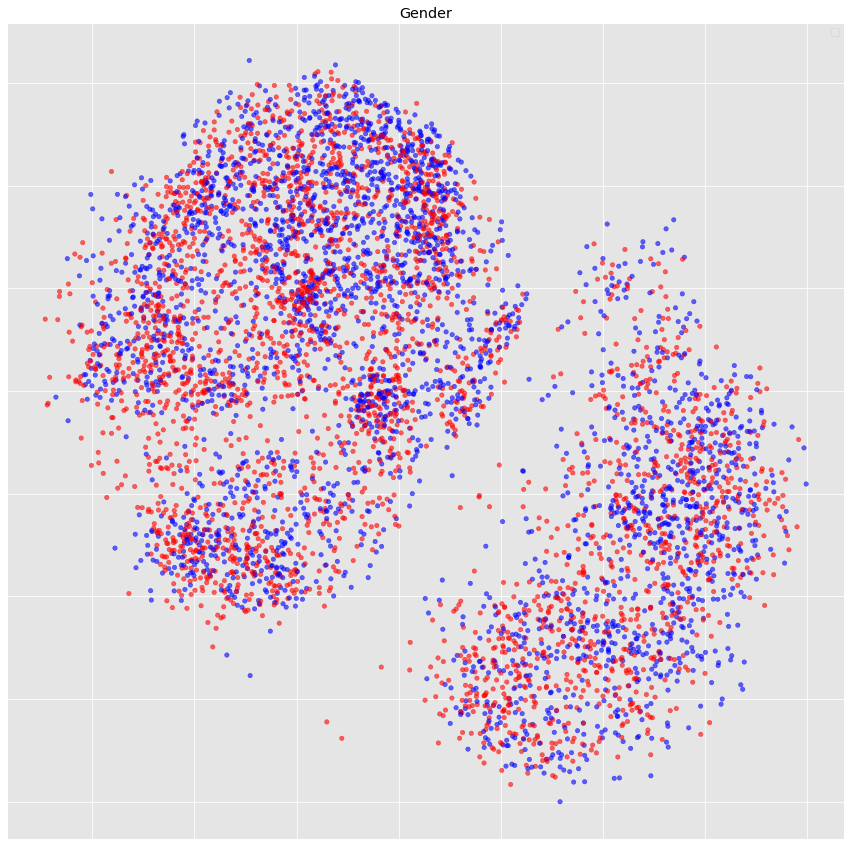

In [14]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Gender')
plt.show()

In [15]:
colmapvar = pd.Series(X['Customer Type']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


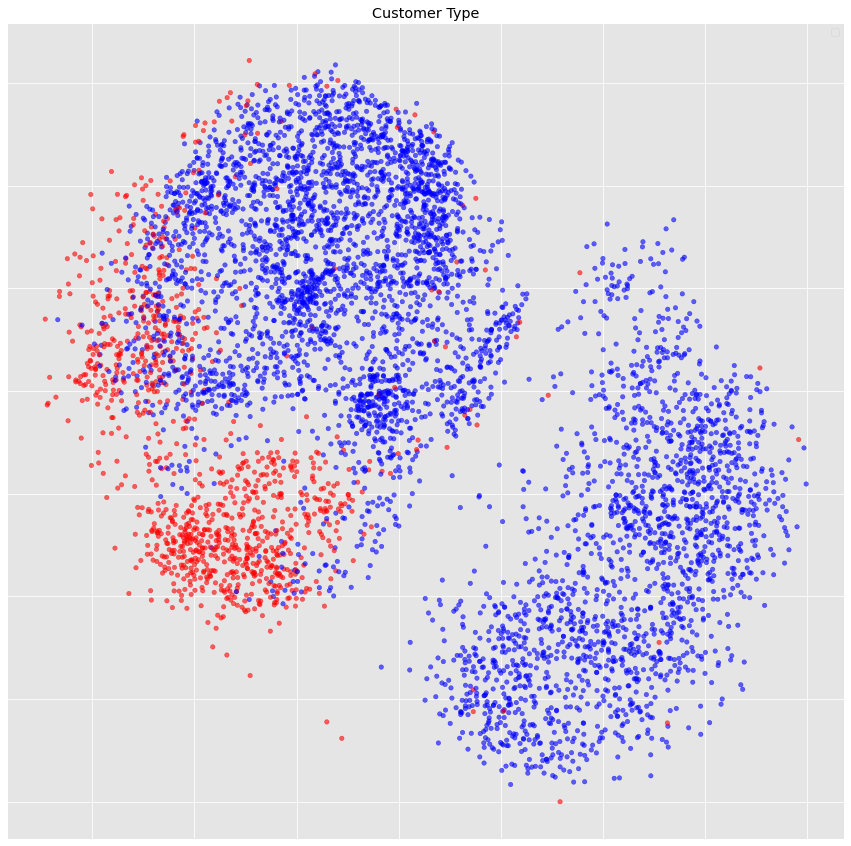

In [16]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Customer Type')
plt.show()

In [17]:
colmapvar = pd.Series(X['Class']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    else:
        color_map.append('green')

No handles with labels found to put in legend.


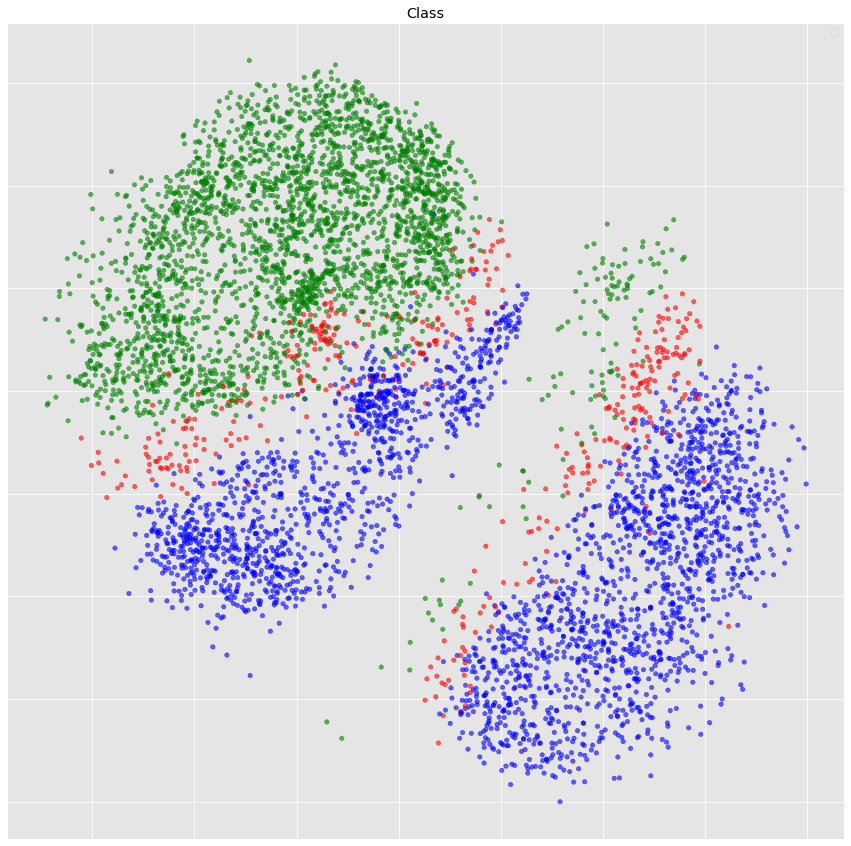

In [18]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Class')
plt.show()

In [19]:
colmapvar = pd.Series(X['Type of Travel']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')


No handles with labels found to put in legend.


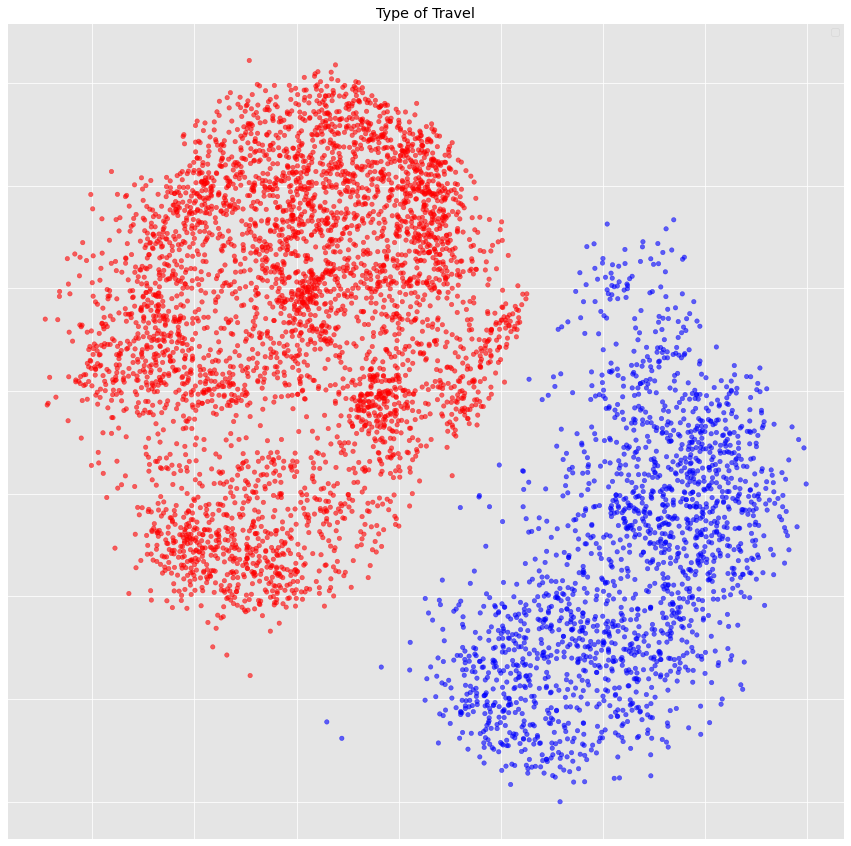

In [20]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Type of Travel')
plt.show()

In [21]:
colmapvar = pd.Series(X['Age']) 
colmapvar = colmapvar.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    elif i[1] == 2:
        color_map.append('green')
    elif i[1] == 3:
        color_map.append('brown')
    else:
        color_map.append('purple')

No handles with labels found to put in legend.


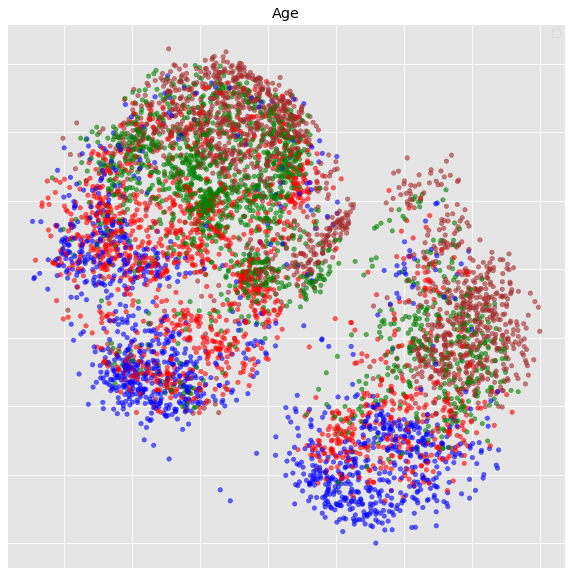

In [22]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Age')
plt.show()

In [23]:
# node2vec
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 2)

In [24]:
Z = pd.DataFrame(t,columns = ['x1','x2'])
Z['features'] = features

In [25]:
import statsmodels.api as sm
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()

Optimization terminated successfully.
         Current function value: 0.511967
         Iterations 6


In [26]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.2550
Time:                        18:01:17   Log-Likelihood:                -3071.8
converged:                       True   LL-Null:                       -4122.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6431      0.361    -10.089      0.000      -4.351      -2.935
x1             3.2748      0.355      9.220      0.000       2.579       3.971
x2            -0.9065      0.027    -33.039      0.0

In [27]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

In [28]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(t,f, test_size = 0.7, shuffle=True)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=1)

Epoch 1/60
1800/1800 [==============================] - 7s 4ms/step - loss: 0.6093 - accuracy: 0.6558 - val_loss: 0.5145 - val_accuracy: 0.7662
Epoch 2/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.5129 - accuracy: 0.7618 - val_loss: 0.5130 - val_accuracy: 0.7674
Epoch 3/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.4887 - accuracy: 0.7938 - val_loss: 0.5105 - val_accuracy: 0.7707
Epoch 4/60
1800/1800 [==============================] - 6s 3ms/step - loss: 0.5017 - accuracy: 0.7697 - val_loss: 0.5101 - val_accuracy: 0.7707
Epoch 5/60
1800/1800 [==============================] - 9s 5ms/step - loss: 0.5031 - accuracy: 0.7734 - val_loss: 0.5097 - val_accuracy: 0.7702
Epoch 6/60
1800/1800 [==============================] - 6s 3ms/step - loss: 0.4954 - accuracy: 0.7782 - val_loss: 0.5104 - val_accuracy: 0.7707
Epoch 7/60
1800/1800 [==============================] - 5s 3ms/step - loss: 0.5212 - accuracy: 0.7606 - val_loss: 0.5100 - val_accuracy:

1800/1800 [==============================] - 5s 3ms/step - loss: 0.5119 - accuracy: 0.7689 - val_loss: 0.5087 - val_accuracy: 0.7714
Epoch 58/60
1800/1800 [==============================] - 7s 4ms/step - loss: 0.5155 - accuracy: 0.7691 - val_loss: 0.5086 - val_accuracy: 0.7729
Epoch 59/60
1800/1800 [==============================] - 6s 3ms/step - loss: 0.5280 - accuracy: 0.7621 - val_loss: 0.5091 - val_accuracy: 0.7729
Epoch 60/60
1800/1800 [==============================] - 6s 3ms/step - loss: 0.4981 - accuracy: 0.7837 - val_loss: 0.5086 - val_accuracy: 0.7726


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.77
-------------------------------------------------------------
Confusion Matrix validation set:
[[2542  786]
 [ 594 2078]]


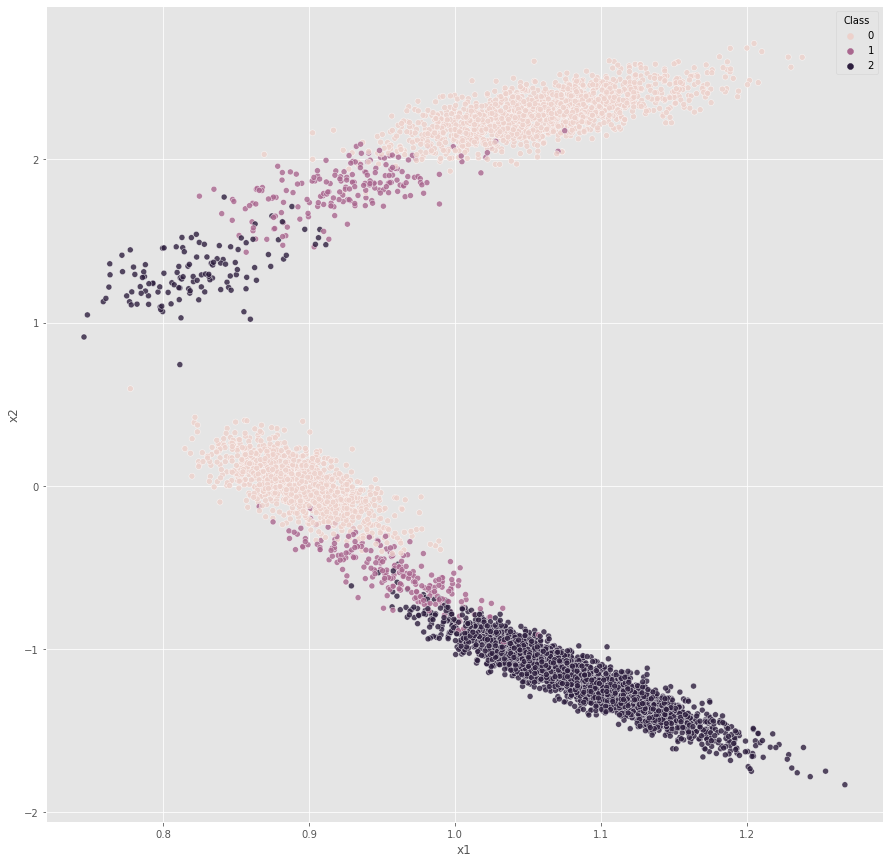

In [31]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=X['Class'],alpha=0.8)
plt.show()

In [59]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.3)
G_dgl.ndata['label'] = torch.tensor(features)

In [60]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [61]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [62]:
train_nodes = (train_mask == True).nonzero(as_tuple=False)
train_nids = torch.reshape(train_nodes,(-1,))
valid_nodes = (valid_mask == True).nonzero(as_tuple=False)
valid_nids = torch.reshape(valid_nodes,(-1,))

In [63]:
sampler = dgl.dataloading.MultiLayerNeighborSampler([4, 4, 4])
train_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, train_nids, sampler,
    batch_size=1024,
    shuffle=True,
    drop_last=False,
    num_workers=0
)

In [64]:
example_minibatch = next(iter(train_dataloader))
print(example_minibatch)

[tensor([1199, 1604, 3692,  ...,  213, 4639, 2760]), tensor([1199, 1604, 3692,  ..., 3324, 5380, 1881]), [Block(num_src_nodes=5993, num_dst_nodes=5764, num_edges=23056), Block(num_src_nodes=5764, num_dst_nodes=3502, num_edges=14008), Block(num_src_nodes=3502, num_dst_nodes=1024, num_edges=4096)]]


In [65]:
input_nodes, output_nodes, layer_connects = example_minibatch
print("To compute {} nodes' output we need {} nodes' input features".format(len(output_nodes), len(input_nodes)))

To compute 1024 nodes' output we need 5993 nodes' input features


In [66]:
valid_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, valid_nids, sampler,
    batch_size=1024,
    shuffle=False,
    drop_last=False,
    num_workers=0
)

In [67]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [68]:
import tqdm
import sklearn.metrics

class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, hid_feats_3, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats_1, aggregator_type='mean', feat_drop=0.1)
        
        self.conv2 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_1, out_feats=hid_feats_1, aggregator_type='mean', feat_drop=0.1)
        
        self.conv3 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_1, out_feats=out_feats, aggregator_type='mean', feat_drop=0.1)
        
#        self.conv4 = dglnn.pytorch.conv.SAGEConv(
#            in_feats=hid_feats_3, out_feats=out_feats, aggregator_type='mean')

    def forward(self, layer_connects, inputs):
        # inputs are features of nodes
        h = self.conv1(layer_connects, inputs)
        h = F.normalize(h, p=2, dim=-1)
        h = F.relu(h)
        h = self.conv2(layer_connects, h)
        h = F.normalize(h, p=2, dim=-1)
        h = F.relu(h)
        h = self.conv3(layer_connects, h)
#        h = F.normalize(h, p=2, dim=-1)
#        h = F.relu(h)
#        h = self.conv4(layer_connects,h)
        h = F.normalize(h, p=2, dim=-1)
        h = F.log_softmax(h,dim=1)
        return h

In [69]:
import tqdm
import sklearn.metrics

class SAGE(nn.Module):
    def __init__(self, in_feats, n_hidden, n_classes, n_layers):
        super().__init__()
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.n_classes = n_classes
        self.layers = nn.ModuleList()
        self.layers.append(dglnn.SAGEConv(in_feats, n_hidden, 'mean'))
        for i in range(1, n_layers - 1):
            self.layers.append(dglnn.SAGEConv(n_hidden, n_hidden, 'mean'))
        self.layers.append(dglnn.SAGEConv(n_hidden, n_classes, 'mean'))
        
    def forward(self, layer_connects, x):
        for l, (layer, layer_connects) in enumerate(zip(self.layers, layer_connects)):
            x = layer(layer_connects, x)
            if l != self.n_layers - 1:
                x = F.relu(x)
        return x

In [70]:
model = SAGE(n_features, 128, n_labels, 3)
opt = torch.optim.Adam(model.parameters())

In [71]:
best_accuracy = 0
best_model_path = 'model.pt'
plot_loss_train = []
plot_loss_valid = []
train_acc = []
valid_acc = []

for epoch in range(100):
    model.train()
    
    with tqdm.tqdm(train_dataloader) as tq:
        for step, (input_nodes, output_nodes, layer_connects) in enumerate(tq):
            layer_connects = [b.to(torch.device('cpu')) for b in layer_connects]
            inputs = node_features[input_nodes]
            labels = node_labels[output_nodes]
            predictions = model(layer_connects, inputs)

            loss = F.cross_entropy(predictions, labels)
            opt.zero_grad()
            loss.backward()
            opt.step()

            accuracy = sklearn.metrics.accuracy_score(labels.cpu().numpy(), predictions.argmax(1).detach().cpu().numpy())
            tq.set_postfix({'loss': '%.03f' % loss.item(), 'acc': '%.03f' % accuracy}, refresh=False)
    plot_loss_train.append(loss.item())
    train_acc.append(accuracy.item())
        
    model.eval()
    
    predictions = []
    labels = []
    with tqdm.tqdm(valid_dataloader) as tq, torch.no_grad():
        for input_nodes, output_nodes, layer_connects in tq:
            layer_connects = [b.to(torch.device('cpu')) for b in layer_connects]
            inputs = node_features[input_nodes]
            labels.append(node_labels[output_nodes].numpy())
            predictions.append(model(layer_connects, inputs).argmax(1).cpu().numpy())
            valid_pred = model(layer_connects, inputs)
            valid_labels = node_labels[output_nodes]
            valid_loss = F.cross_entropy(valid_pred, valid_labels)
        predictions = np.concatenate(predictions)
        labels = np.concatenate(labels)
        
        accuracy = sklearn.metrics.accuracy_score(labels, predictions)
        print('Epoch {} Validation Accuracy {}'.format(epoch, accuracy))
        if best_accuracy < accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), best_model_path)
            
    valid_acc.append(accuracy.item())
    plot_loss_valid.append(valid_loss.item())


 50%|█████     | 1/2 [00:00<00:00,  7.00it/s, loss=0.828, acc=0.582]

Epoch 0 Validation Accuracy 0.5663569216106743


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 Validation Accuracy 0.7005003573981415


 50%|█████     | 1/2 [00:00<00:00,  6.59it/s, loss=0.484, acc=0.776]

Epoch 2 Validation Accuracy 0.7622111031689301


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 3 Validation Accuracy 0.8008101024541339


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 4 Validation Accuracy 0.8236835835120324


 50%|█████     | 1/2 [00:00<00:00,  9.41it/s, loss=0.419, acc=0.840]

Epoch 5 Validation Accuracy 0.82987848463188


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 6 Validation Accuracy 0.835835120324041


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 7 Validation Accuracy 0.833690731474863


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 8 Validation Accuracy 0.844412675720753


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 9 Validation Accuracy 0.8448892065761258


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 10 Validation Accuracy 0.8529902311174649


 50%|█████     | 1/2 [00:00<00:00,  7.85it/s, loss=0.315, acc=0.863]

Epoch 11 Validation Accuracy 0.8548963545389564


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 12 Validation Accuracy 0.8558494162497021


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 13 Validation Accuracy 0.8603764593757446


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 14 Validation Accuracy 0.85465808911127


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 15 Validation Accuracy 0.8587086013819395


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 16 Validation Accuracy 0.8672861567786514


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 17 Validation Accuracy 0.8680009530617108


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 18 Validation Accuracy 0.8725279961877531


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 19 Validation Accuracy 0.8622825827972361


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 20 Validation Accuracy 0.86871574934477


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 21 Validation Accuracy 0.8749106504646176


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 22 Validation Accuracy 0.875625446747677


 50%|█████     | 1/2 [00:00<00:00,  6.38it/s, loss=0.267, acc=0.902]

Epoch 23 Validation Accuracy 0.8722897307600667


 50%|█████     | 1/2 [00:00<00:00,  6.81it/s, loss=0.275, acc=0.891]

Epoch 24 Validation Accuracy 0.8818203478675244


 50%|█████     | 1/2 [00:00<00:00,  6.99it/s, loss=0.260, acc=0.896]

Epoch 25 Validation Accuracy 0.8732427924708125


 50%|█████     | 1/2 [00:00<00:00,  6.95it/s, loss=0.268, acc=0.895]

Epoch 26 Validation Accuracy 0.8744341196092447


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 27 Validation Accuracy 0.8737193233261854


 50%|█████     | 1/2 [00:00<00:00,  7.21it/s, loss=0.241, acc=0.896]

Epoch 28 Validation Accuracy 0.8822968787228973


 50%|█████     | 1/2 [00:00<00:00,  6.94it/s, loss=0.245, acc=0.907]

Epoch 29 Validation Accuracy 0.8825351441505838


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 30 Validation Accuracy 0.8818203478675244


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 31 Validation Accuracy 0.8782463664522278


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 32 Validation Accuracy 0.8801524898737193


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 33 Validation Accuracy 0.8825351441505838


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 34 Validation Accuracy 0.8887300452704313


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 35 Validation Accuracy 0.8873004527043126


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 36 Validation Accuracy 0.8842030021443888


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 37 Validation Accuracy 0.8842030021443888


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 38 Validation Accuracy 0.8863473909935669


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 39 Validation Accuracy 0.8877769835596855


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 40 Validation Accuracy 0.887538718131999


 50%|█████     | 1/2 [00:00<00:00,  8.27it/s, loss=0.197, acc=0.931]

Epoch 41 Validation Accuracy 0.8884917798427449


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 42 Validation Accuracy 0.8882535144150584


 50%|█████     | 1/2 [00:00<00:00,  8.24it/s, loss=0.226, acc=0.913]

Epoch 43 Validation Accuracy 0.8880152489873719


 50%|█████     | 1/2 [00:00<00:00,  5.92it/s, loss=0.228, acc=0.907]

Epoch 44 Validation Accuracy 0.8908744341196092


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 45 Validation Accuracy 0.8930188229687872


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 46 Validation Accuracy 0.892304026685728


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 47 Validation Accuracy 0.887538718131999


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 48 Validation Accuracy 0.8882535144150584


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 49 Validation Accuracy 0.892304026685728


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 50 Validation Accuracy 0.8968310698117703


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 51 Validation Accuracy 0.8973076006671432


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 52 Validation Accuracy 0.892304026685728


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 53 Validation Accuracy 0.8982606623778889


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 54 Validation Accuracy 0.8977841315225161


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 55 Validation Accuracy 0.902072909220872


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 56 Validation Accuracy 0.8965928043840838


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 57 Validation Accuracy 0.8968310698117703


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 58 Validation Accuracy 0.8984989278055754


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 59 Validation Accuracy 0.9008815820824398


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 60 Validation Accuracy 0.8992137240886348


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 61 Validation Accuracy 0.9006433166547534


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 62 Validation Accuracy 0.8992137240886348


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 63 Validation Accuracy 0.9039790326423636


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 64 Validation Accuracy 0.8984989278055754


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 65 Validation Accuracy 0.9037407672146771


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 66 Validation Accuracy 0.8987371932332618


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 67 Validation Accuracy 0.9018346437931856


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 68 Validation Accuracy 0.90421729807005


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 69 Validation Accuracy 0.899928520371694


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 70 Validation Accuracy 0.9049320943531094


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 71 Validation Accuracy 0.9046938289254229


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 72 Validation Accuracy 0.902072909220872


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 73 Validation Accuracy 0.9027877055039314


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 74 Validation Accuracy 0.9008815820824398


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 75 Validation Accuracy 0.9037407672146771


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 76 Validation Accuracy 0.9023111746485585


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 77 Validation Accuracy 0.8975458660948297


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 78 Validation Accuracy 0.9011198475101263


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 79 Validation Accuracy 0.9027877055039314


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 80 Validation Accuracy 0.9030259709316178


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 81 Validation Accuracy 0.9039790326423636


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 82 Validation Accuracy 0.9051703597807959


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 83 Validation Accuracy 0.9075530140576602


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 84 Validation Accuracy 0.9101739337622111


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 85 Validation Accuracy 0.9035025017869907


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 86 Validation Accuracy 0.9056468906361687


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 87 Validation Accuracy 0.9092208720514653


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 88 Validation Accuracy 0.9027877055039314


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 89 Validation Accuracy 0.9049320943531094


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 90 Validation Accuracy 0.9077912794853467


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 91 Validation Accuracy 0.90421729807005


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 92 Validation Accuracy 0.9089826066237789


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 93 Validation Accuracy 0.9096974029068382


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 94 Validation Accuracy 0.9075530140576602


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 95 Validation Accuracy 0.9075530140576602


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 96 Validation Accuracy 0.9054086252084822


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 97 Validation Accuracy 0.9089826066237789


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 98 Validation Accuracy 0.908506075768406


100%|██████████| 5/5 [00:00<00:00, 17.72it/s]

Epoch 99 Validation Accuracy 0.9068382177746009


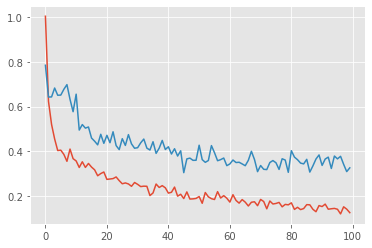

In [72]:
plt.plot(plot_loss_train)
plt.plot(plot_loss_valid)
plt.show()

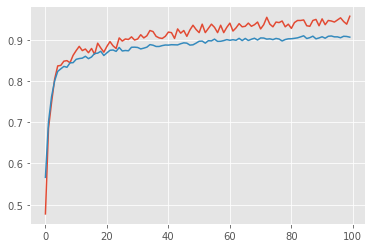

In [73]:
plt.plot(train_acc)
plt.plot(valid_acc)
plt.show()

In [39]:
df_test = pd.read_csv('test.csv',sep=',')
df_test = df_test.sample(n=6000)
df_test.drop(columns=['Unnamed: 0','id'],inplace=True)
df_test.Gender = df_test.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df_test['Customer Type'] = df_test['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df_test['Type of Travel'] = df_test['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df_test['Class'] = df_test['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df_test['satisfaction'] = df_test['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [40]:
TEST = df_test.copy(deep=True)

In [41]:
test_gen = TEST[['Gender','Customer Type','Age','Type of Travel','Class']]
test_gen.Age = test_gen.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.20

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend, 1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}


In [45]:
x = test_gen.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [46]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0

In [47]:
A = A + A.T - np.diag(np.diag(A))

In [48]:
G_test = nx.from_numpy_matrix(A)

In [75]:
test_features = pd.Series(TEST.satisfaction)

In [76]:
G_dgl_test = dgl.from_networkx(G_test)
feat = TEST.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl_test.ndata['feat'] =  embedding
#G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl_test.ndata['label'] = torch.tensor(test_features)

In [77]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
test_nids = G_dgl.nodes()
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [78]:
def inference(model, graph, input_features, batch_size):
    nodes = torch.arange(graph.number_of_nodes())
    
    sampler = dgl.dataloading.MultiLayerNeighborSampler([None])  # one layer at a time, taking all neighbors
    dataloader = dgl.dataloading.NodeDataLoader(
        graph, nodes, sampler,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
        num_workers=0)
    
    with torch.no_grad():
        for l, layer in enumerate(model.layers):
            # Allocate a buffer of output representations for every node
            # Note that the buffer is on CPU memory.
            output_features = torch.zeros(
                graph.number_of_nodes(), model.n_hidden if l != model.n_layers - 1 else model.n_classes)

            for input_nodes, output_nodes, bipartites in tqdm.tqdm(dataloader):
                bipartite = bipartites[0].to(torch.device('cpu'))

                x = input_features[input_nodes]

                # the following code is identical to the loop body in model.forward()
                x = layer(bipartite, x)
                if l != model.n_layers - 1:
                    x = F.relu(x)

                output_features[output_nodes] = x.cpu()
            input_features = output_features
    return output_features

In [79]:
model.load_state_dict(torch.load('model.pt'))
all_predictions = inference(model, G_dgl_test, node_features, 6000)

100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


In [80]:
test_predictions = all_predictions[test_nids].argmax(1)
test_labels = node_labels[test_nids]
test_accuracy = sklearn.metrics.accuracy_score(test_predictions.numpy(), test_labels.numpy())
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9175


In [41]:

model = SAGE(in_feats=n_features, hid_feats_1=120, hid_feats_2 = 100, hid_feats_3=40, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(200):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    
    if epoch % 1 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


Epoch: 0, train loss: 0.8830, validation loss: 0.8866, training accuracy: 0.4247, validation accuracy: 0.4256, Time: 2.0401
Epoch: 1, train loss: 0.7038, validation loss: 0.7001, training accuracy: 0.5537, validation accuracy: 0.5664, Time: 2.3688
Epoch: 2, train loss: 0.6007, validation loss: 0.5988, training accuracy: 0.6657, validation accuracy: 0.6909, Time: 2.2929
Epoch: 3, train loss: 0.5614, validation loss: 0.5596, training accuracy: 0.7203, validation accuracy: 0.7234, Time: 2.1657
Epoch: 4, train loss: 0.5330, validation loss: 0.5291, training accuracy: 0.7408, validation accuracy: 0.7479, Time: 2.0805
Epoch: 5, train loss: 0.5066, validation loss: 0.5015, training accuracy: 0.7612, validation accuracy: 0.7708, Time: 2.0263
Epoch: 6, train loss: 0.4839, validation loss: 0.4790, training accuracy: 0.7902, validation accuracy: 0.7967, Time: 2.0226
Epoch: 7, train loss: 0.4661, validation loss: 0.4619, training accuracy: 0.8101, validation accuracy: 0.8168, Time: 2.0216
Epoch: 8

Epoch: 66, train loss: 0.3389, validation loss: 0.3656, training accuracy: 0.9113, validation accuracy: 0.8899, Time: 2.3066
Epoch: 67, train loss: 0.3380, validation loss: 0.3649, training accuracy: 0.9113, validation accuracy: 0.8908, Time: 2.3042
Epoch: 68, train loss: 0.3371, validation loss: 0.3640, training accuracy: 0.9119, validation accuracy: 0.8906, Time: 2.2987
Epoch: 69, train loss: 0.3363, validation loss: 0.3632, training accuracy: 0.9119, validation accuracy: 0.8908, Time: 2.2973
Epoch: 70, train loss: 0.3354, validation loss: 0.3629, training accuracy: 0.9136, validation accuracy: 0.8908, Time: 2.2947
Epoch: 71, train loss: 0.3350, validation loss: 0.3624, training accuracy: 0.9142, validation accuracy: 0.8908, Time: 2.2935
Epoch: 72, train loss: 0.3394, validation loss: 0.3603, training accuracy: 0.9073, validation accuracy: 0.8937, Time: 2.2921
Epoch: 73, train loss: 0.3345, validation loss: 0.3608, training accuracy: 0.9142, validation accuracy: 0.8920, Time: 2.2909


Epoch: 132, train loss: 0.2858, validation loss: 0.3512, training accuracy: 0.9534, validation accuracy: 0.9003, Time: 2.1985
Epoch: 133, train loss: 0.2841, validation loss: 0.3506, training accuracy: 0.9534, validation accuracy: 0.8996, Time: 2.1955
Epoch: 134, train loss: 0.2843, validation loss: 0.3509, training accuracy: 0.9545, validation accuracy: 0.9005, Time: 2.1937
Epoch: 135, train loss: 0.2824, validation loss: 0.3509, training accuracy: 0.9557, validation accuracy: 0.9000, Time: 2.1936
Epoch: 136, train loss: 0.2821, validation loss: 0.3517, training accuracy: 0.9562, validation accuracy: 0.8991, Time: 2.1925
Epoch: 137, train loss: 0.2809, validation loss: 0.3513, training accuracy: 0.9551, validation accuracy: 0.8996, Time: 2.1938
Epoch: 138, train loss: 0.2802, validation loss: 0.3515, training accuracy: 0.9562, validation accuracy: 0.9010, Time: 2.1913
Epoch: 139, train loss: 0.2791, validation loss: 0.3516, training accuracy: 0.9579, validation accuracy: 0.9000, Time:

Epoch: 198, train loss: 0.2536, validation loss: 0.3526, training accuracy: 0.9778, validation accuracy: 0.9012, Time: 2.1597
Epoch: 199, train loss: 0.2507, validation loss: 0.3517, training accuracy: 0.9790, validation accuracy: 0.9007, Time: 2.1582


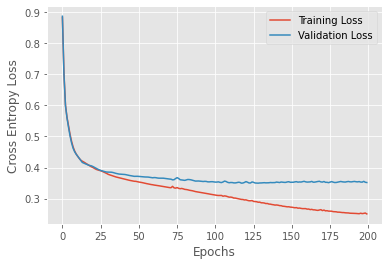

In [42]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

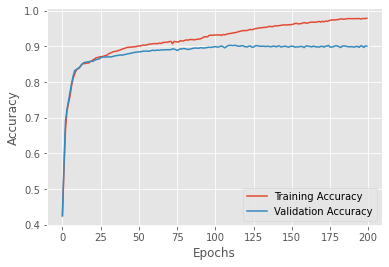

In [43]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=-1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=-1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.9007309596793209
-------------------------------------------------------------
Classification Accuracy training set 0.9789653212052303
-------------------------------------------------------------
Confusion Matrix validation set:
[[2192  154]
 [ 267 1628]]
-------------------------------------------------------------
Confusion Matrix training set:
[[977   5]
 [ 32 745]]


In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(val_lab,indices_val)

0.898316309636007

In [43]:
class GCN(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.GraphConv(
            in_feats=in_feats, out_feats=hid_feats_1)
        
        self.conv2 = dglnn.pytorch.conv.GraphConv(
            in_feats=hid_feats_1, out_feats=out_feats)
        
#        self.conv3 = dglnn.pytorch.conv.GraphConv(
#            in_feats=hid_feats_2, out_feats=out_feats)

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
#        h = F.relu(h)
#        h = self.conv3(graph,h)
        h = F.log_softmax(h,dim=1)
        return h

In [44]:
model = GCN(in_feats=n_features, hid_feats_1=100, hid_feats_2=50, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(150):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


Epoch: 0, train loss: 0.7181, validation loss: 0.7183, training accuracy: 0.3156, validation accuracy: 0.3046, Time: 0.4928
Epoch: 10, train loss: 0.6556, validation loss: 0.6544, training accuracy: 0.7522, validation accuracy: 0.7623, Time: 0.3898
Epoch: 20, train loss: 0.6089, validation loss: 0.6067, training accuracy: 0.7534, validation accuracy: 0.7635, Time: 0.3926
Epoch: 30, train loss: 0.5731, validation loss: 0.5705, training accuracy: 0.7573, validation accuracy: 0.7661, Time: 0.3968
Epoch: 40, train loss: 0.5456, validation loss: 0.5433, training accuracy: 0.7635, validation accuracy: 0.7690, Time: 0.4161
Epoch: 50, train loss: 0.5256, validation loss: 0.5240, training accuracy: 0.7724, validation accuracy: 0.7697, Time: 0.4195
Epoch: 60, train loss: 0.5122, validation loss: 0.5113, training accuracy: 0.7696, validation accuracy: 0.7728, Time: 0.4150
Epoch: 70, train loss: 0.5038, validation loss: 0.5037, training accuracy: 0.7719, validation accuracy: 0.7732, Time: 0.4150
E

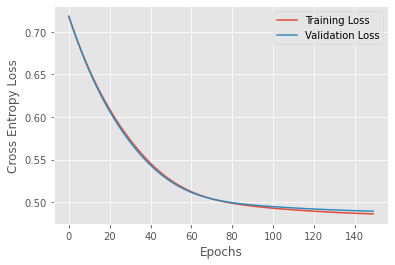

In [45]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

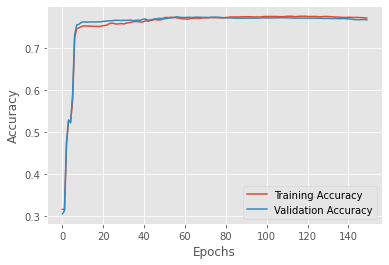

In [46]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:

val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.767314990512334
-------------------------------------------------------------
Classification Accuracy training set 0.7718609865470852
-------------------------------------------------------------
Confusion Matrix validation set:
[[1790  534]
 [ 447 1445]]
-------------------------------------------------------------
Confusion Matrix training set:
[[761 243]
 [164 616]]


In [48]:
roc_auc_score(val_lab,indices_val)

0.7669829120165349

In [49]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.7, shuffle=True)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=5)

Epoch 1/60
360/360 [==============================] - 2s 5ms/step - loss: 0.5541 - accuracy: 0.7551 - val_loss: 0.4047 - val_accuracy: 0.8383
Epoch 2/60
360/360 [==============================] - 2s 4ms/step - loss: 0.3842 - accuracy: 0.8533 - val_loss: 0.3520 - val_accuracy: 0.8562
Epoch 3/60
360/360 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8665 - val_loss: 0.3290 - val_accuracy: 0.8710
Epoch 4/60
360/360 [==============================] - 2s 4ms/step - loss: 0.3124 - accuracy: 0.8745 - val_loss: 0.3108 - val_accuracy: 0.8807
Epoch 5/60
360/360 [==============================] - 2s 6ms/step - loss: 0.2705 - accuracy: 0.8861 - val_loss: 0.2958 - val_accuracy: 0.8879
Epoch 6/60
360/360 [==============================] - 2s 5ms/step - loss: 0.2705 - accuracy: 0.8909 - val_loss: 0.2849 - val_accuracy: 0.8957
Epoch 7/60
360/360 [==============================] - 2s 5ms/step - loss: 0.2463 - accuracy: 0.9018 - val_loss: 0.2752 - val_accuracy: 0.8969
Epoch 

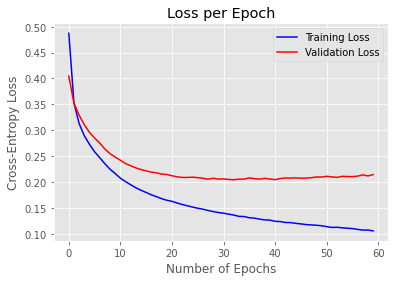

In [51]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

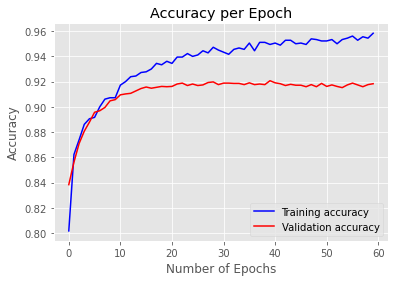

In [52]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [53]:
from sklearn import svm

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.6, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.95875
0.9238888888888889


In [54]:
yhat_svm = clf.predict(x_test)
yhat_train_svm = clf.predict(x_train)

print('Classification Accuracy validation set {}'.format(accuracy_score(y_test,yhat_svm)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(yhat_train_svm,y_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(y_test,yhat_svm))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(yhat_train_svm,y_train))

Classification Accuracy validation set 0.9238888888888889
-------------------------------------------------------------
Classification Accuracy training set 0.95875
-------------------------------------------------------------
Confusion Matrix validation set:
[[1888  104]
 [ 170 1438]]
-------------------------------------------------------------
Confusion Matrix training set:
[[1306   69]
 [  30  995]]


In [55]:
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(feat,features, test_size = 0.6, shuffle=True)

log_reg = sm.Logit(y_train, x_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.342772
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 2400
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           20
Date:                Tue, 18 May 2021   Pseudo R-squ.:                  0.5022
Time:                        15:19:12   Log-Likelihood:                -822.65
converged:                       True   LL-Null:                       -1652.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0810      0.064     -1.273      0.203      -0.206       0.044
1             -0.7753      0.

In [56]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(clf.score(x_train,y_train))

0.8780555555555556
0.8733333333333333


In [57]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8583333333333333
0.8669444444444444
